## Daily Challenge: Interactive Data Visualization With Plotly And Plotnine

1. Data Preparation:
- Download and explore the Global Superstore Orders dataset.
- Perform basic data cleaning and preprocessing.

In [76]:
import pandas as pd
from plotnine import *
import plotly.express as px

In [88]:
# Load data from a CSV file
df = pd.read_excel(r'/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## --- Data Cleaning and Preparation ---

In [90]:
# Check for missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [58]:
# Remove duplicates
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [91]:
# Check data types
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

2. Data Visualization with Plotly:
- Create an interactive line chart to show sales trends over the years.
- Build an interactive map to visualize sales distribution by states.

In [60]:
# Group total sales by the years

df['Year'] = df['Ship Date'].dt.year

sales_by_years = df.groupby('Year', as_index = False).agg({'Sales':'sum'})
sales_by_years

,Year,Sales
0,2014,470383.1931
1,2015,479442.5020
2,2016,611325.7530
3,2017,730889.7154
4,2018,5159.6968


In [92]:
# Create an interactive line chart to show sales trends over the years

fig = px.line(sales_by_years, x='Year', y='Sales', title='Sales Trends Over the Years')

fig.show()

In [62]:
# Build an interactive map to visualize sales distribution by states

df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [68]:
df['State_code'] = df['State'].replace({
  'Alabama': 'AL',
  'Alaska':	'АК',
  'Arizona':'AZ',
  'Arkansas':	'AR',
  'California':	'CA',
  'Colorado':	'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia':	'DC',
  'Florida':	'FL',
  'Georgia':	'GA',
  'Hawaii':	'HI',
  'Idaho':	'ID',
  'Illinois':	'IL',
  'Indiana':	'IN',
  'Iowa':	'IA',
  'Kansas':	'KS',
  'Kentucky':	'KY',
  'Louisiana':	'LA',
  'Maine':	'ME',
  'Maryland':	'MD',
  'Massachusetts':	'МА',
  'Michigan':	'MI',
  'Minnesota':	'MN',
  'Mississippi':	'MS',
  'Missouri':	'МО',
  'Montana':	'MT',
  'Nebraska':	'NE',
  'Nevada':	'NV',
  'New Hampshire':	'NH',
  'New Jersey':	'NJ',
  'New Mexico':	'NM',
  'New York':	'NY',
  'North Carolina':	'NC',
  'North Dakota':	'ND',
  'Ohio':	'ОН',
  'Oklahoma':	'ОК',
  'Oregon':	'OR',
  'Pennsylvania':	'РА',
  'Rhode Island':	'RI',
  'South Carolina':	'SC',
  'South Dakota':	'SD',
  'Tennessee':	'TN',
  'Texas':	'ТХ',
  'Utah':	'UT',
  'Vermont':	'VT',
  'Virginia':	'VA',
  'Washington':	'WA',
  'West Virginia':	'WV',
  'Wisconsin':	'WI',
  'Wyoming':	'WY'
})

In [69]:
sales_by_state = df.groupby('State_code', as_index = False).agg({'Sales':'sum'})
sales_by_state.head()

,State_code,Sales
0,AL,19510.6400
1,AR,11678.1300
2,AZ,35282.0010
3,CA,457687.6315
4,CO,32108.1180


In [73]:
fig = px.choropleth(
    sales_by_state,
    locations='State_code',
    locationmode='USA-states',
    color='Sales',
    scope='usa',
    title='Sales Distribution by State',
    color_continuous_scale='fall',)

fig.show()

3. Data Visualization with Plotnine:
- Use Plotnine to generate a bar chart showing top 10 products by sales.
- Create a scatter plot to analyze the relationship between profit and discount.

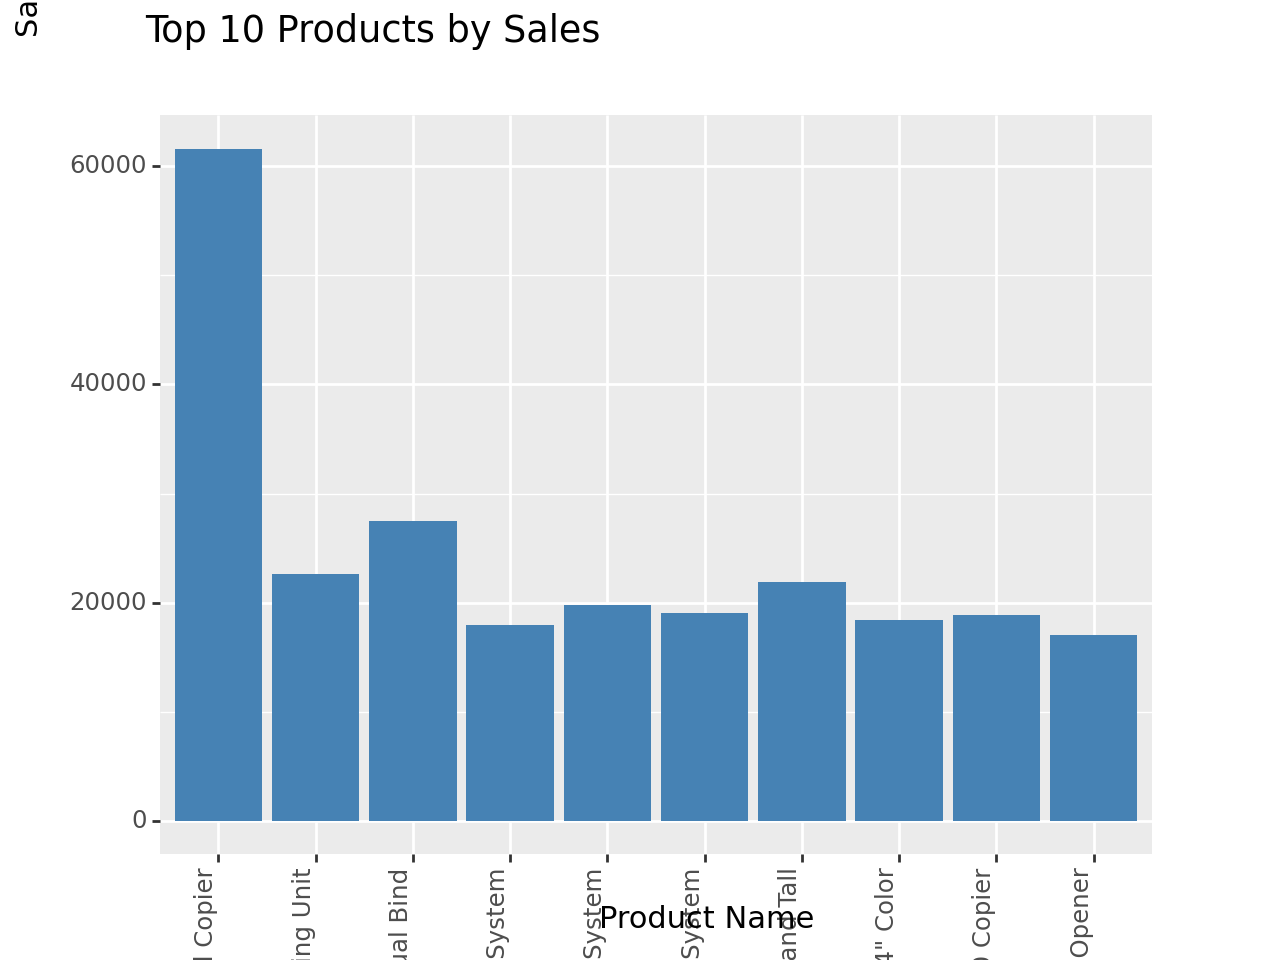

In [99]:
# Use Plotnine to generate a bar chart showing top 10 products by sales

top_products = df.groupby('Product Name', as_index = False).agg({'Sales':'sum'}).sort_values('Sales', ascending=False).head(10)

fig = (ggplot(top_products, aes(x='Product Name', y='Sales')) +
      geom_bar(stat='identity', fill='steelblue') +
      labs(title='Top 10 Products by Sales', x='Product Name', y='Sales') +
      theme(axis_text_x=element_text(angle=90, hjust=1)))

print(fig)

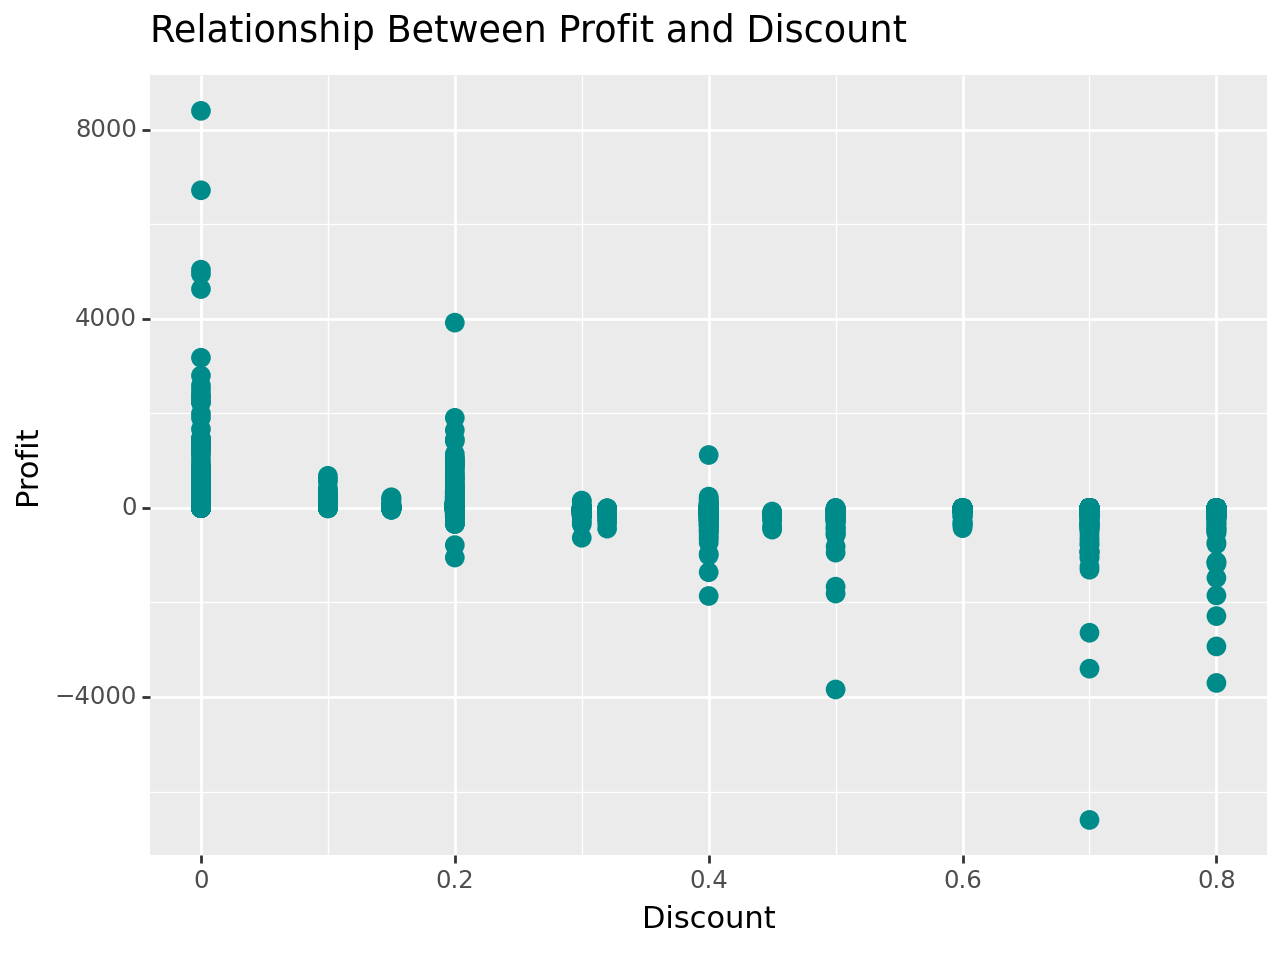

In [87]:
# Create a scatter plot to analyze the relationship between profit and discount

fig = (
    ggplot(df, aes(x='Discount', y='Profit')) +
    geom_point(color='darkcyan', size=3) +
    labs(title='Relationship Between Profit and Discount', x='Discount', y='Profit'))

print(fig)

4. Comparative Analysis:
- Compare the insights gained from Plotly and Plotnine visualizations.
- Document your observations about the ease of use and effectiveness of both tools.

**Plotly:**
Plotly is user-friendly with excellent interactive features, offering a wide range of chart types and strong web integration. While Plotly Express simplifies basic charts, advanced features may have a learning curve.

**Plotnine:**
Plotnine, based on the "Grammar of Graphics," excels in customization and aesthetics, integrating seamlessly with Pandas. Its Matplotlib-like syntax is intuitive for those familiar, but the learning curve may be steeper for beginners. The library is effective for detailed and visually appealing plots.